# <b> Importando as bibliotecas e dados </b>

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [166]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(labels=['Ticket'], axis=1)
test = test.drop(labels=['Ticket'], axis=1)

# <b> Análise dos dados </b>

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [168]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [169]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análise das features dois a dois

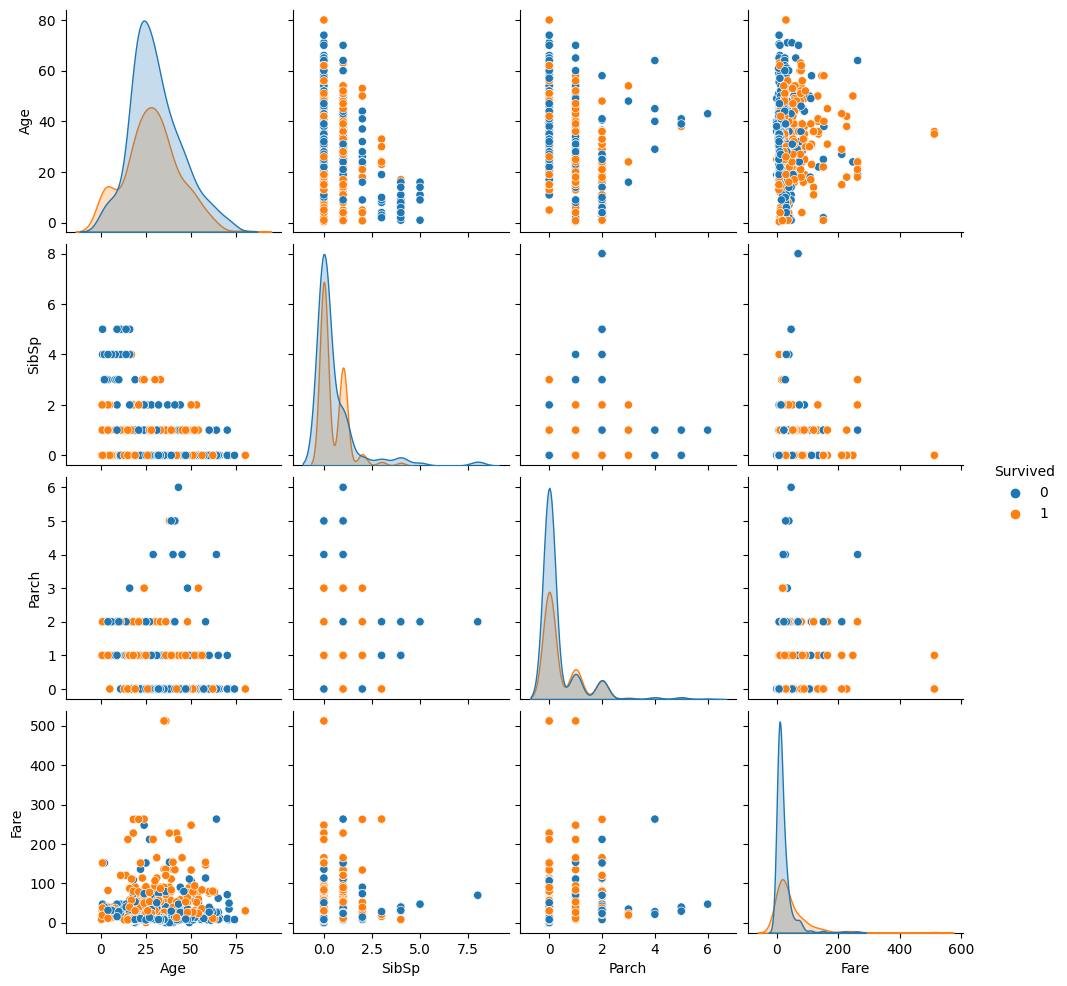

In [170]:
sns.pairplot(train,  hue = 'Survived', vars = ['Age','SibSp', 'Parch','Fare'])

### Análise feature a feature

<Axes: xlabel='Pclass', ylabel='count'>

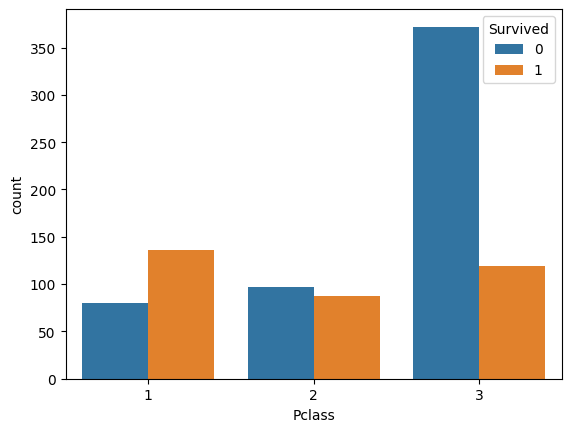

In [171]:
#parece relevante
sns.countplot(x='Pclass', data=train, hue ='Survived')

<Axes: xlabel='Age', ylabel='Count'>

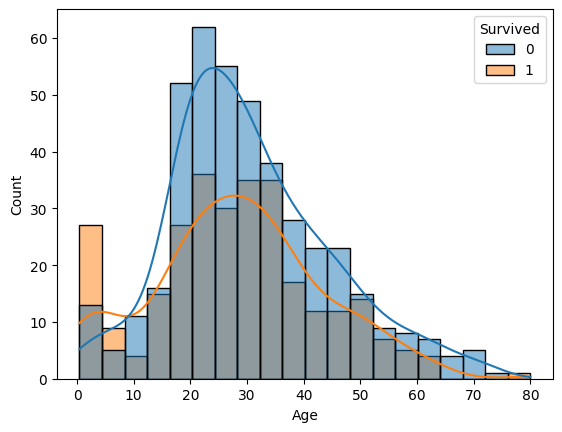

In [172]:
#parece relevante
sns.histplot(data=train, x='Age', kde=True, hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

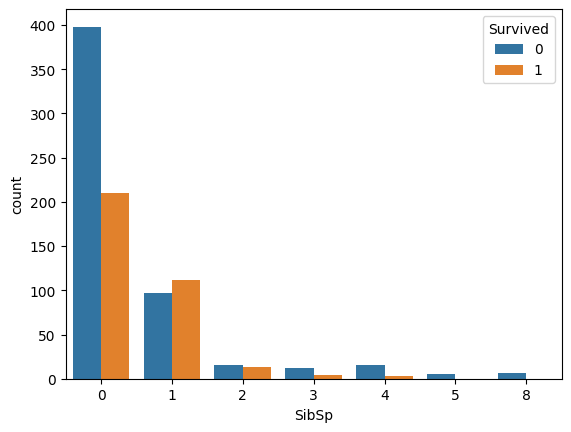

In [173]:
#parece relevante
sns.countplot(x='SibSp', data=train, hue ='Survived')

<Axes: xlabel='Parch', ylabel='count'>

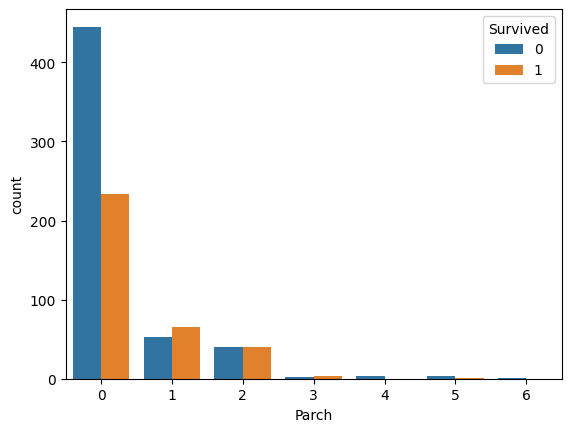

In [174]:
#parece relevante
sns.countplot(x='Parch', data=train, hue ='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

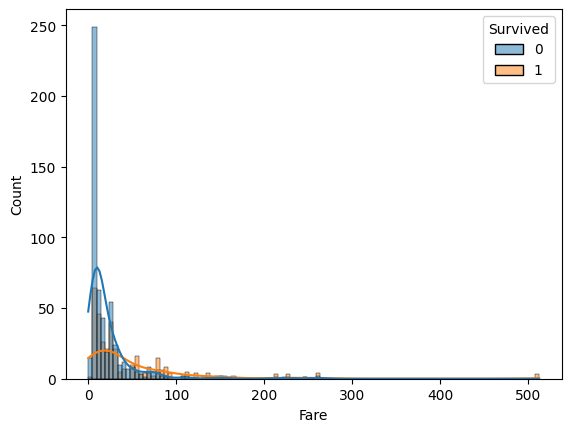

In [175]:
#parece relevante, mas Pclass já retrata a situação financeira dos passageiros
sns.histplot(data=train, x='Fare', kde=True, hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

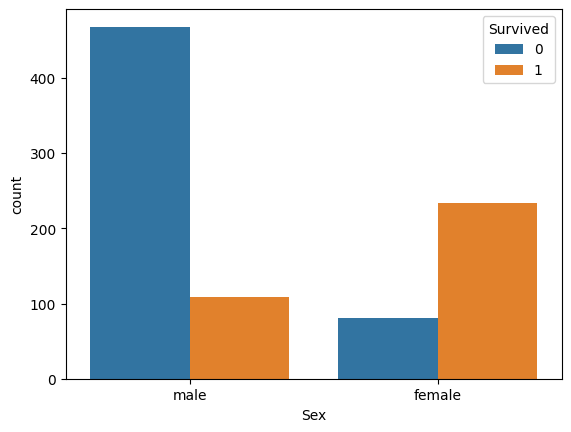

In [176]:
#parece relevante
sns.countplot(x='Sex', data=train, hue ='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

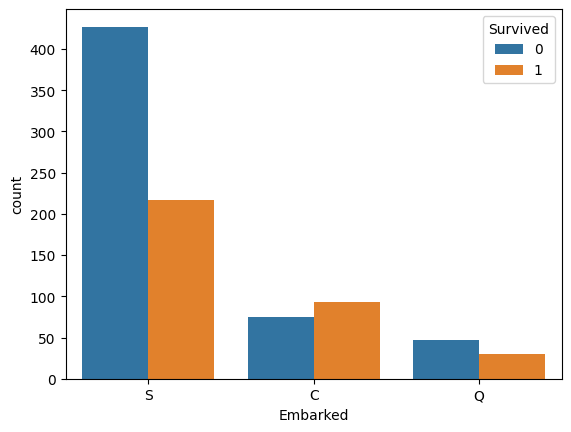

In [177]:
#parece relevante
sns.countplot(x='Embarked', data=train, hue ='Survived')

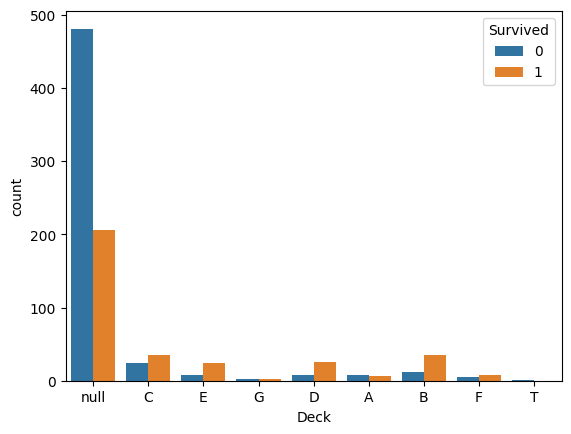

In [178]:
deck = []
for x in train['Cabin']:
    if type(x) != float:
        deck.append(x[0])
    else:
        deck.append('null')
train.insert(10, 'Deck', deck)
sns.countplot(x='Deck', data=train, hue ='Survived')
train = train.drop(labels=['Deck'], axis=1)
#não parece generalizável para os dados faltantes

In [179]:
pd.concat([train, test], axis = 0).loc[:,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000


# <b> Tratamento de dados </b>

### Tratando os dados de embarque

In [180]:
ID = test['PassengerId']
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [181]:
train = train.dropna(subset=['Embarked'])

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [183]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [184]:
df = pd.concat([train, test], axis = 0, ignore_index=True, sort=False)
veja = list(range(len(df)))
df['index'] = veja

In [185]:
H = pd.get_dummies(df['Embarked'])
P = pd.get_dummies(df['Pclass'])
P = P.add_prefix('class_')
H = pd.concat([P, H], axis = 1).reindex(H.index)
H = H.astype(int)
H.head()

,class_1,class_2,class_3,C,Q,S
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,0,1,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,0,1


In [186]:
df = pd.concat([df, H], axis = 1).reindex(H.index)

Excluindo colunas irrelevantes

In [187]:
df = df.drop(columns = ['Pclass','Embarked','Cabin','Fare', 'PassengerId'])
df['Sex'] = df['Sex'].replace(['male', 'female'],[0, 1])
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,index,class_1,class_2,class_3,C,Q,S
0,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,0,0,0,1,0,0,1
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0,1,0,0
2,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,2,0,0,1,0,0,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,1,0,0,0,0,1
4,0.0,"Allen, Mr. William Henry",0,35.0,0,0,4,0,0,1,0,0,1


Salvando o endereço dos dados de teste e treino

In [188]:
train_index = len(df) - len(ID)
test_index = len(ID)
print(train_index)
print(test_index)

889
418


### Tratando os dados de idade

In [189]:
print('Média de idade da classe 1: ', df[df['class_1'] == 1]['Age'].mean())
print('Média de idade da classe 2: ', df[df['class_2'] == 1]['Age'].mean())
print('Média de idade da classe 3: ', df[df['class_3'] == 1]['Age'].mean())

Média de idade da classe 1:  39.08304964539007
Média de idade da classe 2:  29.506704980842912
Média de idade da classe 3:  24.81636726546906


Verificando se todos os passageiros possuem um título no nome e obtendo a posição de cada um deles de acordo com o título

In [190]:
df[:train_index ]

,Survived,Name,Sex,Age,SibSp,Parch,index,class_1,class_2,class_3,C,Q,S
0,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,0,0,0,1,0,0,1
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0,1,0,0
2,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,2,0,0,1,0,0,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,1,0,0,0,0,1
4,0.0,"Allen, Mr. William Henry",0,35.0,0,0,4,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,"Montvila, Rev. Juozas",0,27.0,0,0,884,0,1,0,0,0,1
885,1.0,"Graham, Miss. Margaret Edith",1,19.0,0,0,885,1,0,0,0,0,1
886,0.0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,886,0,0,1,0,0,1
887,1.0,"Behr, Mr. Karl Howell",0,26.0,0,0,887,1,0,0,1,0,0


In [191]:
titles = defaultdict(list)
cont = 0
for i in df['Name']:    
    name = i
    name = name.split(', ')[1]
    name = name.split('.')[0]
    titles[name].append(cont)
    cont += 1

sum = 0
for key,val in titles.items():
    print(key, " => ", val)
    sum += len(val)
print('\n\x1b[91mtítulos obtidos: \x1b[0m', sum)
print('\x1b[94mtotal de pessoas:\x1b[0m', len(df))


Mr  =>  [0, 4, 5, 6, 12, 13, 17, 20, 21, 23, 26, 27, 29, 33, 34, 35, 36, 37, 42, 45, 46, 48, 51, 54, 55, 57, 60, 61, 63, 66, 68, 69, 71, 72, 73, 74, 75, 76, 79, 80, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 106, 107, 109, 111, 114, 115, 116, 117, 119, 120, 121, 123, 125, 126, 128, 129, 130, 133, 134, 136, 137, 138, 142, 143, 144, 145, 147, 151, 152, 153, 154, 156, 157, 159, 161, 162, 167, 168, 169, 172, 173, 174, 177, 178, 180, 184, 186, 187, 188, 190, 195, 196, 199, 200, 201, 202, 203, 205, 206, 208, 209, 211, 212, 213, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 231, 233, 235, 237, 238, 241, 242, 243, 247, 249, 251, 252, 259, 261, 262, 264, 265, 266, 269, 270, 272, 276, 279, 280, 281, 282, 283, 284, 285, 286, 287, 291, 293, 294, 295, 297, 300, 301, 303, 307, 312, 313, 319, 320, 323, 325, 330, 331, 332, 334, 335, 337, 338, 341, 342, 343, 348, 349, 350, 351, 352, 353, 354, 359, 360, 362, 363, 364, 369, 370, 371, 372, 376, 377, 378, 381

Obtendo as somas das idades de cada título para cada classe

In [192]:
df_base = df[:train_index]

medias = defaultdict(list)
for key in titles:
    medias[key] = [0, 0, 0, 0, 0, 0]

for key in medias:
    for val in titles[key]:
        if(val < train_index):
            if df_base.loc[val]['class_1'] == 1 and pd.isnull(df_base.loc[val]['Age']) == False:
                medias[key][0] += df_base.loc[val]['Age']
                medias[key][1] += 1
            elif df_base.loc[val]['class_2'] == 1 and pd.isnull(df_base.loc[val]['Age']) == False:
                medias[key][2] += df_base.loc[val]['Age']
                medias[key][3] += 1
            elif df_base.loc[val]['class_3'] == 1 and pd.isnull(df_base.loc[val]['Age']) == False:
                medias[key][4] += df_base.loc[val]['Age']
                medias[key][5] += 1

#sumx = somatório de idades da classe x
#nx   = quantidade de pessoas daquela classe x
print('\n\x1b[96mtitulo  =>  [sum1, n1, sum2, n2, sum3, n3]\x1b[0m')
for key,val in medias.items():
    print(key, " => ", val)


titulo  =>  [sum1, n1, sum2, n2, sum3, n3]
Mr  =>  [3617.5, 87, 2687.0, 82, 6578.0, 229]
Mrs  =>  [1328.0, 33, 1381.0, 41, 1106.0, 33]
Miss  =>  [1312.0, 44, 716.5, 32, 1112.5, 69]
Master  =>  [15.92, 3, 20.33, 9, 128.42000000000002, 24]
Don  =>  [40.0, 1, 0, 0, 0, 0]
Rev  =>  [0, 0, 259.0, 6, 0, 0]
Dr  =>  [175.0, 4, 77.0, 2, 0, 0]
Mme  =>  [24.0, 1, 0, 0, 0, 0]
Ms  =>  [0, 0, 28.0, 1, 0, 0]
Major  =>  [97.0, 2, 0, 0, 0, 0]
Lady  =>  [48.0, 1, 0, 0, 0, 0]
Sir  =>  [49.0, 1, 0, 0, 0, 0]
Mlle  =>  [48.0, 2, 0, 0, 0, 0]
Col  =>  [116.0, 2, 0, 0, 0, 0]
Capt  =>  [70.0, 1, 0, 0, 0, 0]
the Countess  =>  [33.0, 1, 0, 0, 0, 0]
Jonkheer  =>  [38.0, 1, 0, 0, 0, 0]
Dona  =>  [0, 0, 0, 0, 0, 0]


Média desses valores obtidos

In [193]:
for key in titles:
    if medias[key][1] != 0:
        medias[key][0] = medias[key][0] / medias[key][1]
    if medias[key][3] != 0:
        medias[key][2] = medias[key][2] / medias[key][3]
    if medias[key][5] != 0:
        medias[key][4] = medias[key][4] / medias[key][5]
for key,val in medias.items():
    print(key, " => ", val)

Mr  =>  [41.58045977011494, 87, 32.76829268292683, 82, 28.724890829694324, 229]
Mrs  =>  [40.24242424242424, 33, 33.68292682926829, 41, 33.515151515151516, 33]
Miss  =>  [29.818181818181817, 44, 22.390625, 32, 16.1231884057971, 69]
Master  =>  [5.306666666666667, 3, 2.2588888888888885, 9, 5.350833333333334, 24]
Don  =>  [40.0, 1, 0, 0, 0, 0]
Rev  =>  [0, 0, 43.166666666666664, 6, 0, 0]
Dr  =>  [43.75, 4, 38.5, 2, 0, 0]
Mme  =>  [24.0, 1, 0, 0, 0, 0]
Ms  =>  [0, 0, 28.0, 1, 0, 0]
Major  =>  [48.5, 2, 0, 0, 0, 0]
Lady  =>  [48.0, 1, 0, 0, 0, 0]
Sir  =>  [49.0, 1, 0, 0, 0, 0]
Mlle  =>  [24.0, 2, 0, 0, 0, 0]
Col  =>  [58.0, 2, 0, 0, 0, 0]
Capt  =>  [70.0, 1, 0, 0, 0, 0]
the Countess  =>  [33.0, 1, 0, 0, 0, 0]
Jonkheer  =>  [38.0, 1, 0, 0, 0, 0]
Dona  =>  [0, 0, 0, 0, 0, 0]


Atribuindo as médias obtidas para as idades faltantes

In [194]:
for key in medias:
    for val in titles[key]:
        if df.loc[val]['class_1'] == 1 and pd.isnull(df.loc[val]['Age']) == True:
            df.at[val, 'Age'] = medias[key][0]
        elif df.loc[val]['class_2'] == 1 and pd.isnull(df.loc[val]['Age']) == True:
            df.at[val, 'Age'] = medias[key][2]
        elif df.loc[val]['class_3'] == 1 and pd.isnull(df.loc[val]['Age']) == True:
            df.at[val, 'Age'] = medias[key][4]       

In [195]:
df.isna().sum()

Survived    418
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
index         0
class_1       0
class_2       0
class_3       0
C             0
Q             0
S             0
dtype: int64

In [196]:
df = df.drop(columns = ['Name', 'index'])
df.head()

,Survived,Sex,Age,SibSp,Parch,class_1,class_2,class_3,C,Q,S
0,0.0,0,22.0,1,0,0,0,1,0,0,1
1,1.0,1,38.0,1,0,1,0,0,1,0,0
2,1.0,1,26.0,0,0,0,0,1,0,0,1
3,1.0,1,35.0,1,0,1,0,0,0,0,1
4,0.0,0,35.0,0,0,0,0,1,0,0,1


In [197]:
test_index = train_index
new_train = df[:train_index].copy()
new_test = df[test_index:].copy()

# <b> Machine Learning </b>

In [198]:
def set_data(traindf=new_train, testdf=new_test):
    y = traindf['Survived']
    x = traindf.loc[:, ['Sex', 'Age', 'SibSp', 'Parch', 'class_1', 'class_2', 'class_3', 'C', 'Q', 'S']]
    out = testdf.loc[:, ['Sex', 'Age', 'SibSp', 'Parch', 'class_1', 'class_2', 'class_3', 'C', 'Q', 'S']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True)

    x = x.to_numpy()
    y = y.to_numpy()
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()
    out = out.to_numpy()
    return x, y, X_train, y_train, X_test, y_test, out

## Regressão Logística <i> (from scratch) </i>

In [199]:
X, y, X_train, y_train, X_test, y_test, out = set_data()

Utilizando a versão com Y = {-1, +1}

In [200]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1
y[y == 0] = -1

### Funções implementadas

In [201]:
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )

In [202]:
def cross_entropy_loss(w, X, y):
    loss = 0
    for i in range(X.shape[0]):
        g = -y[i] * w.T
        loss += np.log(1 + np.exp(g @ X[i]))
    loss = loss / X.shape[0]
    return loss

In [203]:
def cross_entropy_gradient(w, X, y):
    gradient = 0
    for i in range(X.shape[0]):
        g = y[i] * w.T
        g = g @ X[i]
        gradient += (y[i] * X[i]) / (1 + np.exp(g))
    gradient = gradient / (-X.shape[0])
    return gradient


In [204]:
def train_logistic(X, y, learning_rate = 1e-1, w0 = None,\
                        num_iterations = 1000, return_history = False):
    X = add_column_of_ones(X)
    list = []
    if w0 == None:
        w0 = np.random.normal(loc = 0, scale = 1, size = X.shape[1])

    for i in range(num_iterations):
        list.append(cross_entropy_loss(w0, X, y))
        gradiente = cross_entropy_gradient(w0, X, y)
        w0 = w0 - learning_rate * gradiente
    list.append(cross_entropy_loss(w0, X, y))
    if return_history == True:
        return w0, list
    else:
        return w0


In [205]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_logistic(X, w):
    pred_y = np.zeros(X.shape[0])
    X = add_column_of_ones(X)
    for i in range(X.shape[0]):
        pred_y[i] = sigmoid(w.T @ X[i])
    return pred_y

In [206]:
def acuracia(X, y, w):
    #prevendo
    cont = 0
    K = add_column_of_ones(X)
    for i in range(X.shape[0]):
        g = sigmoid(w.T @ K[i])
        if g > 0.5:
            cont += 1

    #calculando a matriz de confusão
    if(np.count_nonzero(y == 1) > cont):
        TP = cont
    else:
        TP = np.count_nonzero(y == 1)
    if(np.count_nonzero(y == -1) > (y.shape[0] - cont)):
        TN = (y.shape[0] - cont)
    else:
        TN = np.count_nonzero(y == -1)
    FP = abs(np.count_nonzero(y == 1) - cont)
    FN = abs(np.count_nonzero(y == -1) - (y.shape[0] - cont))

    #exibindo dados
    print('real lives:      ', np.count_nonzero(y == 1))
    print('logistic lives:  ', cont)
    print('real deads:      ',  np.count_nonzero(y == -1))
    print('logistic deads:  ', y.shape[0] - cont)
    print('\x1b[92mAccuracy = \x1b[0m', (TP + TN) / (TP + TN + FP + FN) * 100, '\n')

### Validação

In [207]:
#normalization
for i in range(X_train.shape[1]):
    avg = np.mean(X_train[:, i])
    stddev = np.std(X_train[:, i])
    X_train[:, i] = (X_train[:, i] - avg) / stddev
    X_test[:, i] = (X_test[:, i] - avg) / stddev

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# print the mean value of each of the features
print("\nTraining set, after normalization:")
for i in range(0,X_train.shape[1]):
    print("  Mean value of column '%d' = %f" \
          %(i,np.mean(X_train[:, i])))
    
print("\nTesting set, after normalization:")
for i in range(0,X_test.shape[1]):
    print("  Mean value of column '%d' = %f" \
          %(i,np.mean(X_test[:, i])))

Shape of X_train:  (711, 10)
Shape of X_test:  (178, 10)

Training set, after normalization:
  Mean value of column '0' = -0.000000
  Mean value of column '1' = -0.000000
  Mean value of column '2' = -0.000000
  Mean value of column '3' = 0.000000
  Mean value of column '4' = 0.000000
  Mean value of column '5' = 0.000000
  Mean value of column '6' = 0.000000
  Mean value of column '7' = 0.000000
  Mean value of column '8' = -0.000000
  Mean value of column '9' = -0.000000

Testing set, after normalization:
  Mean value of column '0' = -0.065529
  Mean value of column '1' = -0.080581
  Mean value of column '2' = 0.155780
  Mean value of column '3' = 0.095689
  Mean value of column '4' = -0.190366
  Mean value of column '5' = -0.014558
  Mean value of column '6' = 0.178699
  Mean value of column '7' = -0.029251
  Mean value of column '8' = 0.065766
  Mean value of column '9' = -0.014877


Final weight:
 [-0.673617    1.45112066 -0.66658608 -0.45880602  0.02312558  1.0928567
  0.45391445 -0.12768607 -0.76342308 -0.65563192 -1.07624344]

Final loss:
 0.4083444679334495


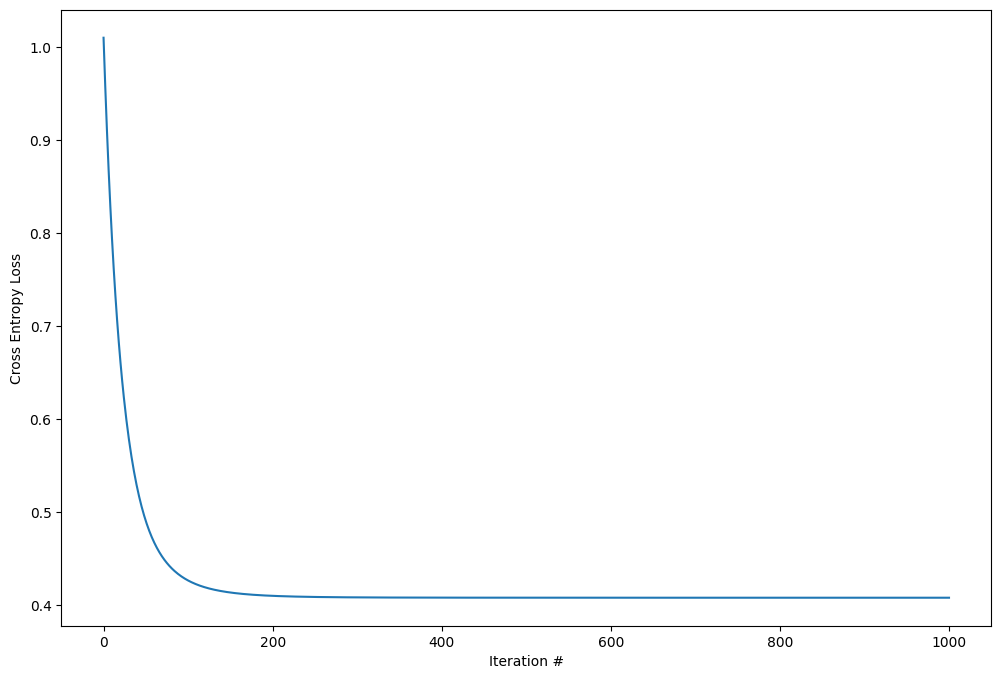

In [208]:
w_logistic, loss = train_logistic(X_train, y_train, learning_rate=0.1, return_history=True)
print("\x1b[94mFinal weight:\n\x1b[0m", w_logistic)
print("\n\x1b[94mFinal loss:\n\x1b[0m", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [209]:
print('\x1b[93mUsing training data \x1b[0m')
acuracia(X_train, y_train, w_logistic)
print('\x1b[93mUsing test data \x1b[0m')
acuracia(X_test, y_test, w_logistic)

Using training data 
real lives:       277
logistic lives:   262
real deads:       434
logistic deads:   449
Accuracy =  95.86776859504133 

Using test data 
real lives:       63
logistic lives:   51
real deads:       115
logistic deads:   127
Accuracy =  87.36842105263159 



### Treinamento

In [210]:
#normalization
for i in range(X.shape[1]):
    avg = np.mean(X[:, i])
    stddev = np.std(X[:, i])
    X[:, i] = (X[:, i] - avg) / stddev
    out[:, i] = (out[:, i] - avg) / stddev

Final weight:
 [-0.67052239  1.27951184 -0.60776276 -0.38715052 -0.05733645  2.04297118
  1.46120897  1.14554126 -0.26111495 -0.25806679 -0.50053648]

Final loss:
 0.43763443060551954


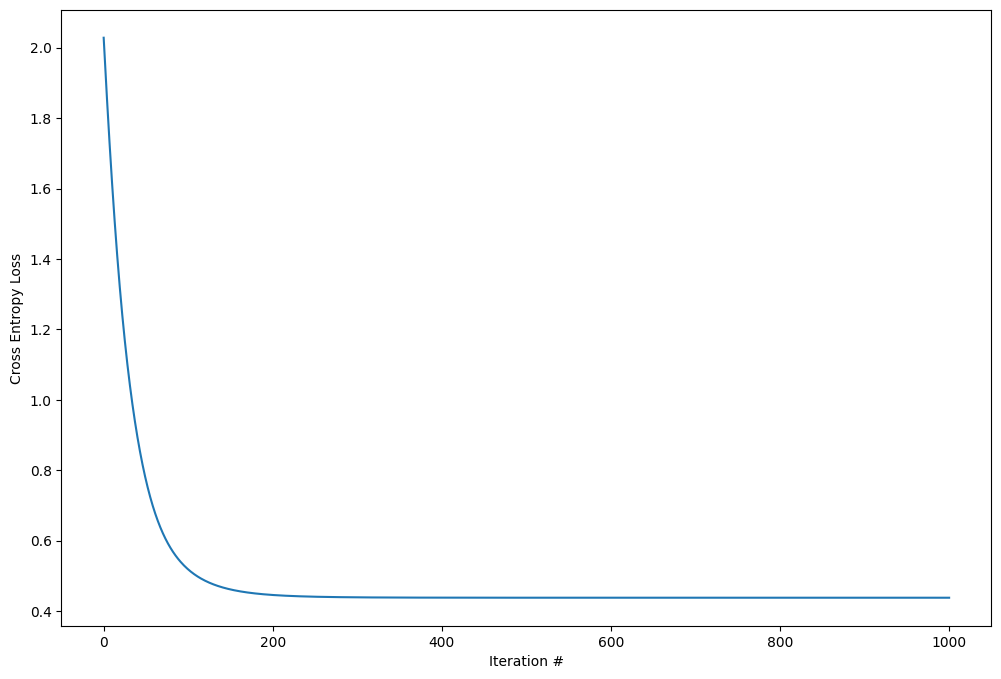

In [211]:
w_logistic, loss = train_logistic(X, y, learning_rate=0.1, return_history=True)
print("\x1b[94mFinal weight:\n\x1b[0m", w_logistic)
print("\n\x1b[94mFinal loss:\n\x1b[0m", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [212]:
print('\x1b[93mUsing all data \x1b[0m')
acuracia(X, y, w_logistic)

Using all data 
real lives:       340
logistic lives:   310
real deads:       549
logistic deads:   579
Accuracy =  93.47116430903155 



### Para submeter

In [213]:
Logistic_regression = pd.DataFrame({'Survived': range(418)})
Logistic_regression = pd.concat([ID, Logistic_regression], axis = 1)

In [214]:
K = add_column_of_ones(out)
for i in range(out.shape[0]):
    g = sigmoid(w_logistic.T @ K[i])
    if g > 0.5:
        Logistic_regression.at[i, 'Survived'] = 1
    else:
        Logistic_regression.at[i, 'Survived'] = 0

In [215]:
Logistic_regression.to_csv('LogisticRegression.csv', index = False)

## Regressão Logística <i> (com bibliotecas) </i>

In [216]:
X, y, X_train, y_train, X_test, y_test, out = set_data()

### Validação

In [217]:
for i in range(X.shape[1]):
    avg = np.mean(X[:, i])
    stddev = np.std(X[:, i])
    X[:, i] = (X[:, i] - avg) / stddev
    out[:, i] = (out[:, i] - avg) / stddev

In [218]:
model = LogisticRegression(max_iter=1000)
crossv = cross_validate(model, X, y, cv=5)
score = crossv['test_score'].mean()
print('\x1b[93mUsing cross validation on data \x1b[0m')
print('\x1b[92mAccuracy = \x1b[0m', score*100, '\n')

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('\x1b[93mUsing just a split on data \x1b[0m')
print('\x1b[92mAccuracy = \x1b[0m', score*100)

Using cross validation on data 
Accuracy =  80.43039421062656 

Using just a split on data 
Accuracy =  82.02247191011236


### Treinamento

In [219]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
LR_ac = model.score(X, y)
LogisticRegression2 = model.predict(out)
LogisticRegression2 = pd.DataFrame({'PassengerId': ID, 'Survived': LogisticRegression2}).astype(int)

### Para submeter

In [220]:
LogisticRegression2.to_csv('LogisticRegression2.csv', index = False)

## KNN (K-nearest neighbors)

In [221]:
X, y, X_train, y_train, X_test, y_test, out = set_data()

### Validação e escolha dos melhores parâmetros

In [222]:
for i in range(X.shape[1]):
    avg = np.mean(X[:, i])
    stddev = np.std(X[:, i])
    X[:, i] = (X[:, i] - avg) / stddev
    out[:, i] = (out[:, i] - avg) / stddev

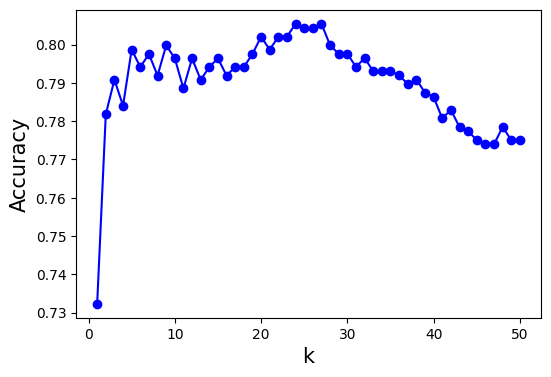

Best k:  27
Best accuracy:  80.54275376118835


In [223]:
scores = {}
#Cross validation k a k
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv = cross_validate(model, X, y, cv=5)
    score = cv['test_score'].mean()
    scores[n_neighbors] = score

plt.figure(figsize=(6,4))
plt.plot(scores.keys(), scores.values(), '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()
best_k = max(scores, key=scores.get)
best_score = scores[best_k]
print('\x1b[93mBest k: \x1b[0m', best_k)
print('\x1b[92mBest accuracy: \x1b[0m', best_score*100)

### Treinamento

In [224]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X, y)
KNN_ac = model.score(X, y)
KNN_perto = model.predict(out)
KNN_perto = pd.DataFrame({'PassengerId': ID, 'Survived': KNN_perto}).astype(int)

### Para submeter

In [225]:
KNN_perto.to_csv('KNN.csv', index = False)

## Random Forest

In [226]:
X, y, X_train, y_train, X_test, y_test, out = set_data()

### Validação e escolha dos melhores parâmetros

In [227]:
param_grid = { 
    'n_estimators': [200, 500],         # número de árvores na floresta
    'max_features': ['sqrt', 'log2'],   # número de features a se considerar para cada divisão
    'max_depth' : [7,8,9,10],           # profundidade máxima da árvore
}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5, verbose=1)
grid_search_RF=grid.fit(X, y)

print('\n\x1b[93mBest parameters: \x1b[0m', grid_search_RF.best_params_)
print('\x1b[92mBest accuracy: \x1b[0m', grid_search_RF.best_score_*100)

Fitting 5 folds for each of 16 candidates, totalling 80 fits



Best parameters:  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}
Best accuracy:  81.2181806640005


### Treinamento

In [228]:
model = RandomForestClassifier(n_estimators=500, max_depth=7, max_features='sqrt', random_state=42)
model.fit(X, y)
RF_ac = model.score(X, y)
Matagal = model.predict(out)
Matagal = pd.DataFrame({'PassengerId': ID, 'Survived': Matagal}).astype(int)

### Para submeter

In [229]:
Matagal.to_csv('RandomForest.csv', index = False)

## SVM (Support Vector Machine)

In [230]:
X, y, X_train, y_train, X_test, y_test, out = set_data()

### Validação e escolha dos melhores parâmetros

In [231]:
for i in range(X.shape[1]):
    avg = np.mean(X[:, i])
    stddev = np.std(X[:, i])
    X[:, i] = (X[:, i] - avg) / stddev
    out[:, i] = (out[:, i] - avg) / stddev

In [232]:
param_grid = {'C': [1, 10,50],                              # paramêtro de regularização
              'gamma': [1, 0.1, 0.005, 0.00001, 0.0000001], # coeficiente do kernel
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose = 1)
grid_search_svm=grid.fit(X, y)
print('\n\x1b[93mBest parameters: \x1b[0m', grid_search_svm.best_params_)
print('\x1b[92mBest accuracy: \x1b[0m', grid_search_svm.best_score_*100)

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters:  {'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}
Best accuracy:  81.5552593156859


### Treinamento

In [233]:
model = SVC(C=50, gamma=0.005, kernel='rbf')
model.fit(X, y)
SVM_ac = model.score(X, y)
svm = model.predict(out)
svm = pd.DataFrame({'PassengerId': ID, 'Survived': svm}).astype(int)

### Para submeter

In [234]:
svm.to_csv('SVM.csv', index = False)

# <b> Resultados </b>

In [235]:
print('\x1b[92mAll accuracies\x1b[0m (except the first one):\n')
print('Logistic Regression: ', round(LR_ac*100, 2), '%')
print('KNN:                 ', round(KNN_ac*100, 2), '%')
print('Random Forest:       ', round(RF_ac*100, 2), '%')
print('SVM:                 ', round(SVM_ac*100, 2), '%')

All accuracies (except the first one):

Logistic Regression:  80.54 %
KNN:                  81.55 %
Random Forest:        87.06 %
SVM:                  82.9 %
